#### 1.Load data

In [1]:
#### 1.Load data
### 1)Loading clinical data
COAD_UCSC_Toil_tpm_dataset_merge.syn2623706 <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/UCSC_Toil/COAD_UCSC_Toil_tpm_dataset_merge.syn2623706.rds")
COAD.pheno.merge.all1 <- COAD_UCSC_Toil_tpm_dataset_merge.syn2623706$COAD.pheno.merge.all1
### 2)Loading cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
### 3)Merge COAD.pheno.merge.all1 and Cluster.df
Plot.df <- dplyr::left_join(Cluster.df, COAD.pheno.merge.all1, by = "rownames")
### 4)Merge new clinical and molecular data
# read more clinical and molecular data
TCGA.COAD.ClinicalV2 <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_COAD_clinical_data/2020_2_10_TCGA.COAD.ClinicalV2.rds")
Plot.df <- dplyr::left_join(Plot.df, TCGA.COAD.ClinicalV2, by = "rownames")


#### 2.Plot Molecular data

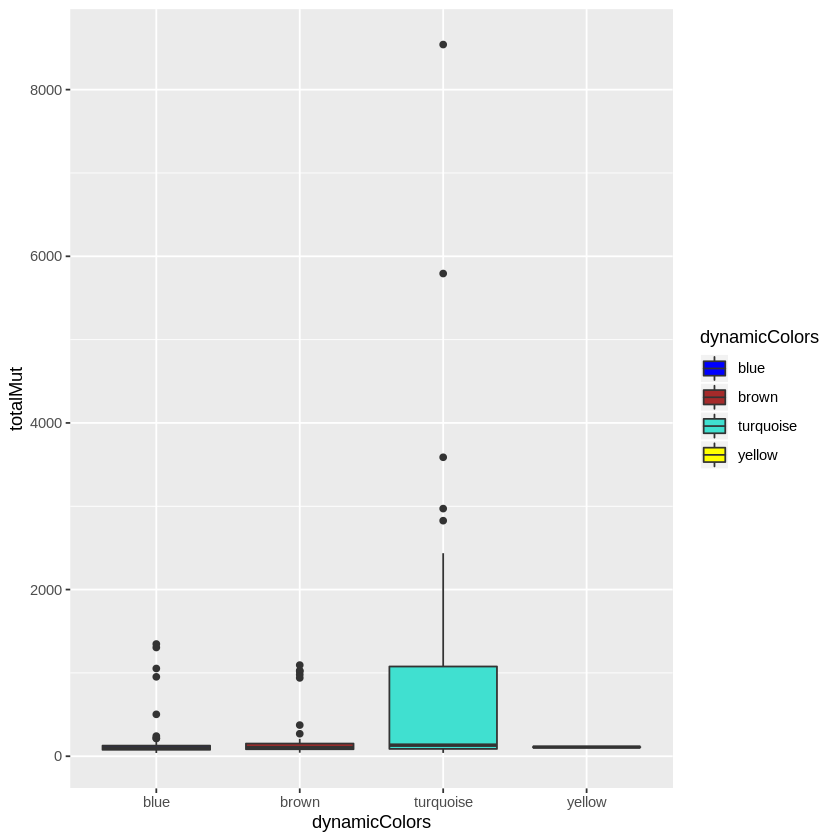

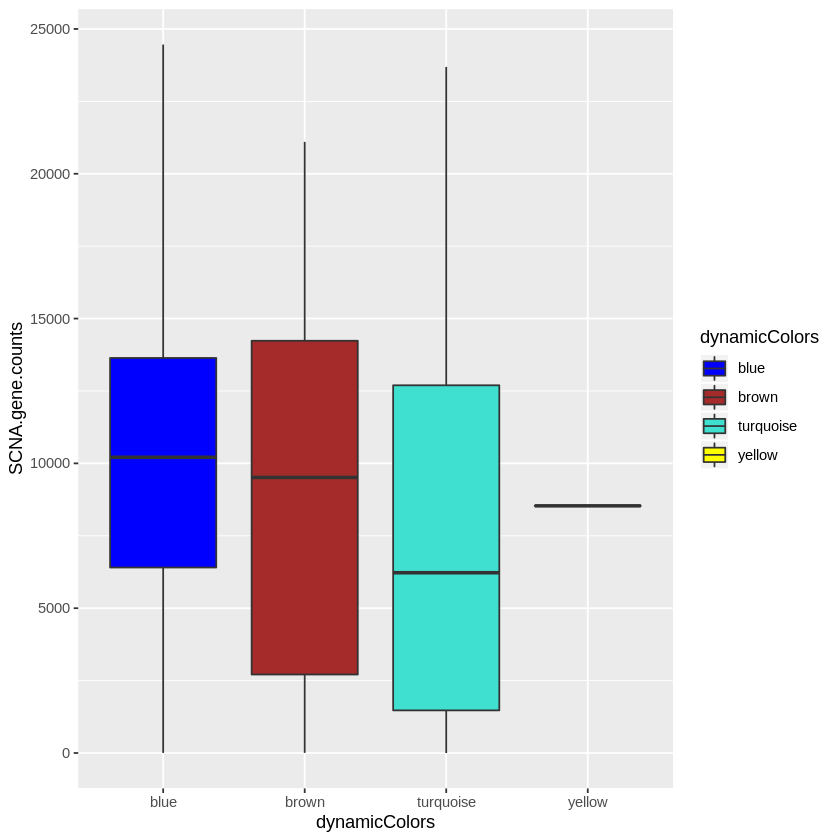

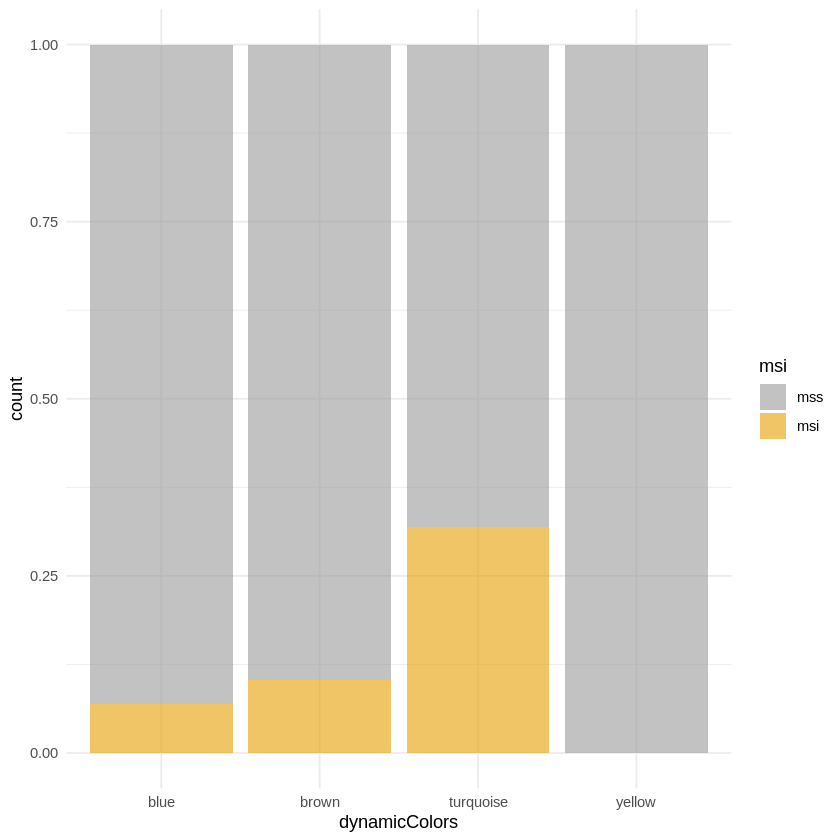

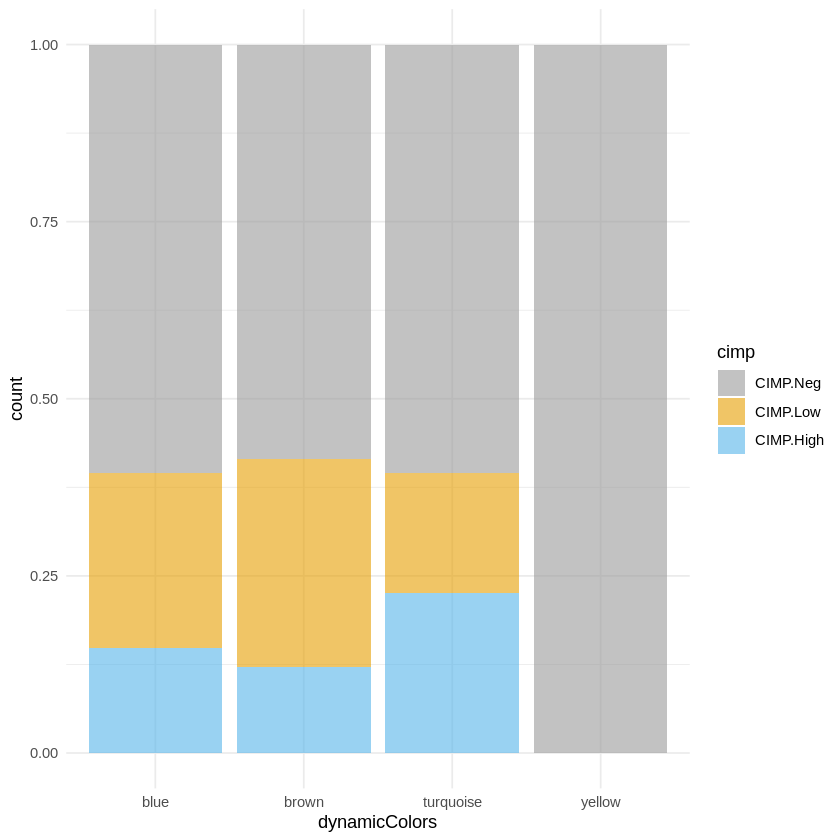

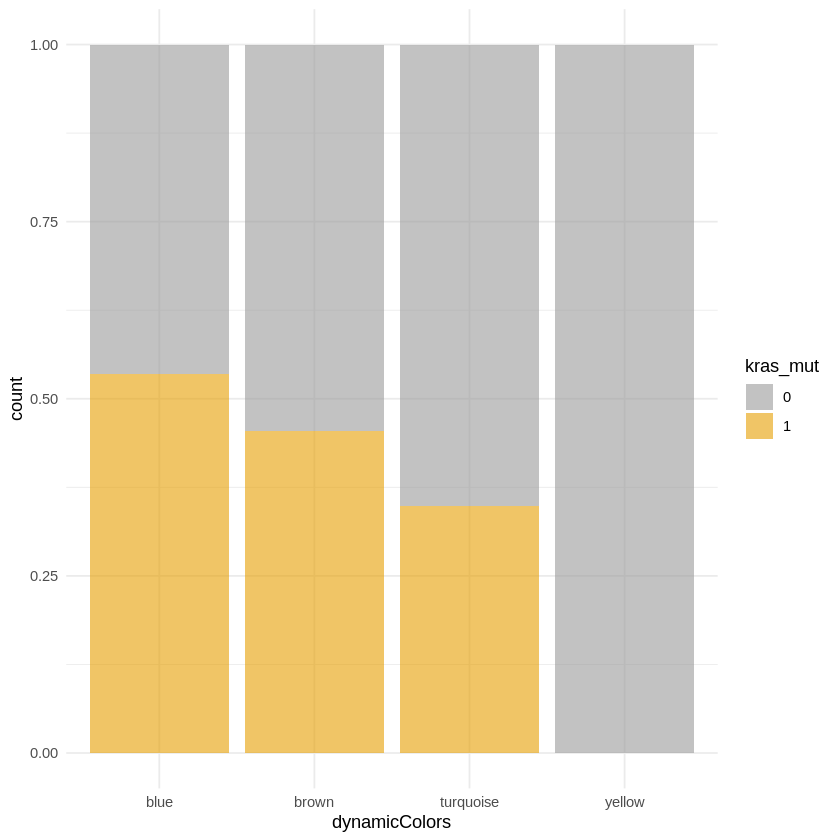

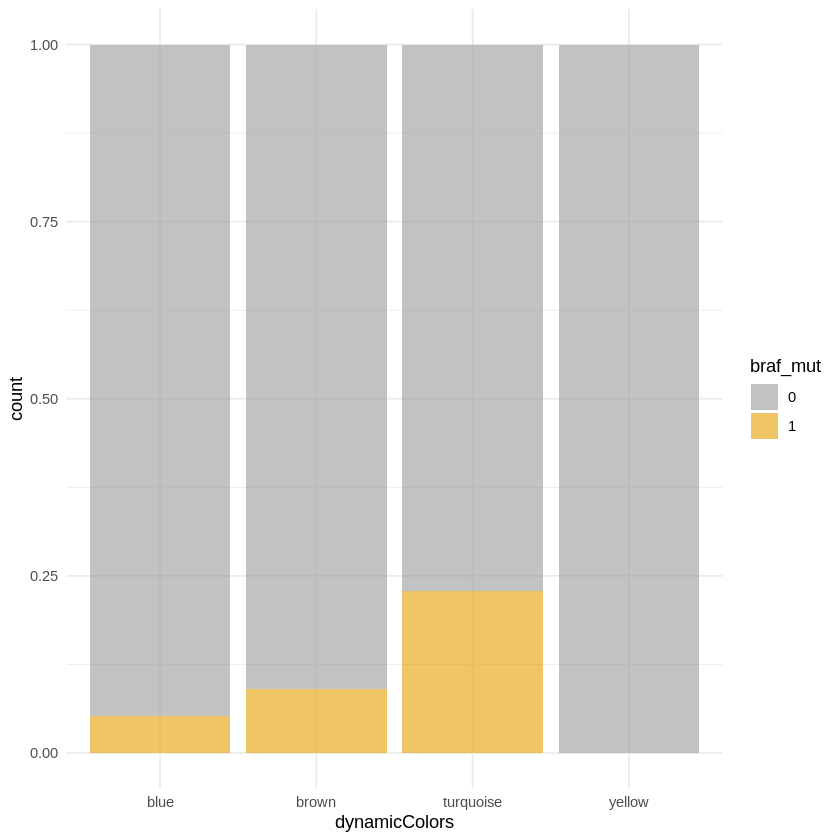

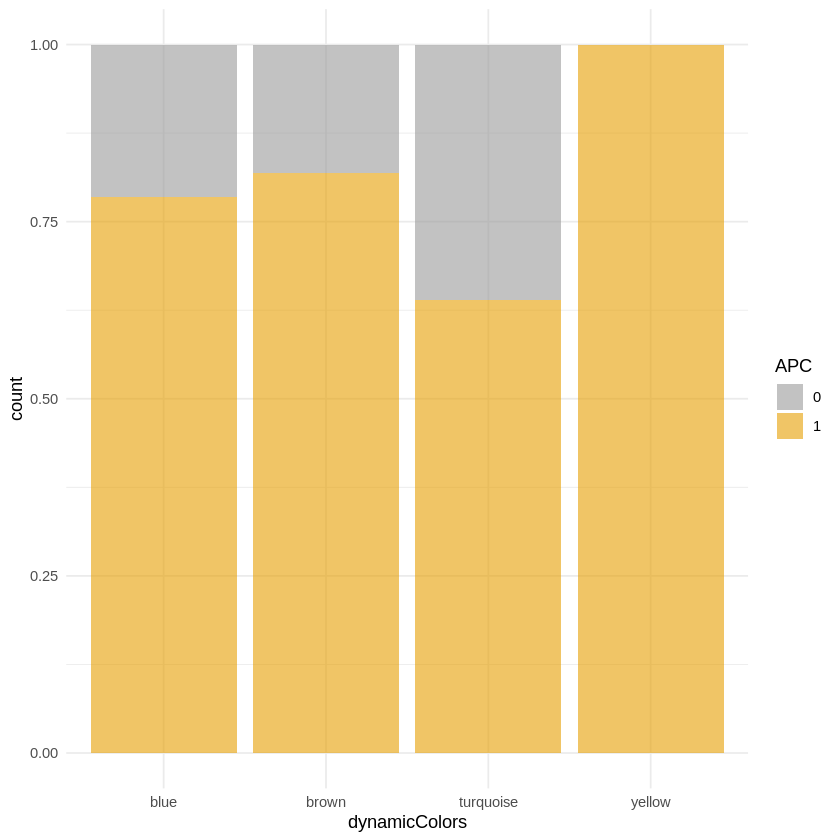

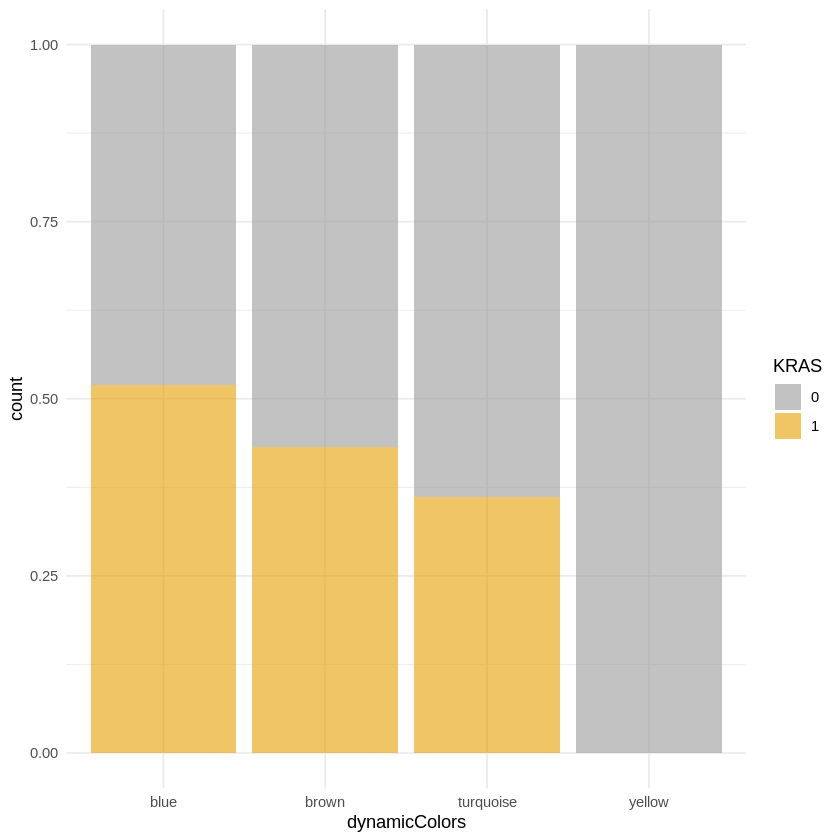

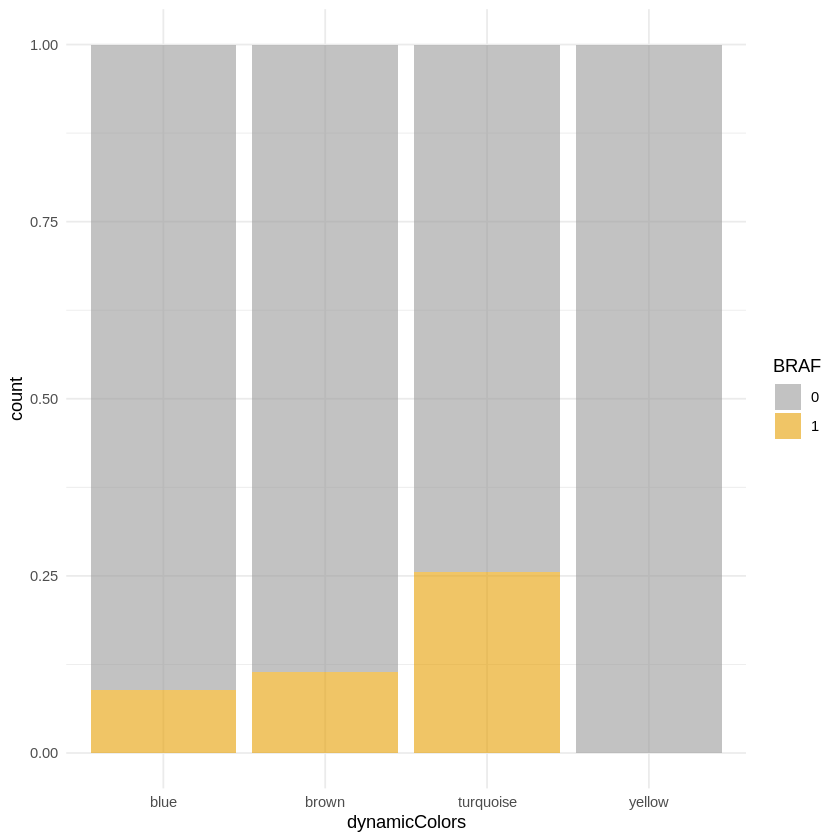

Warning message:
“Removed 19 rows containing non-finite values (stat_boxplot).”

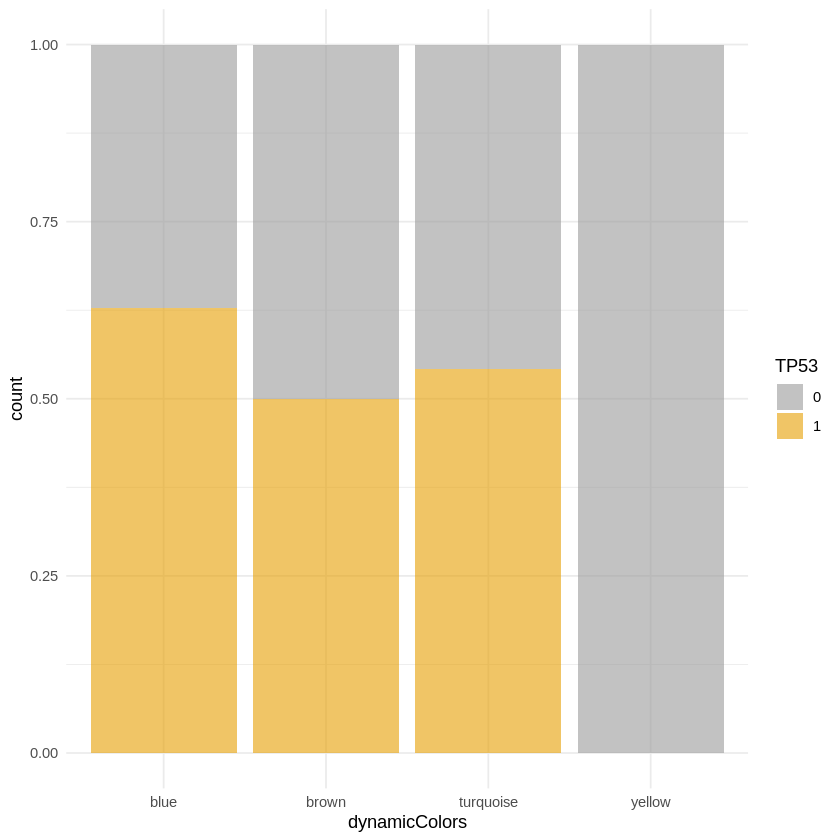

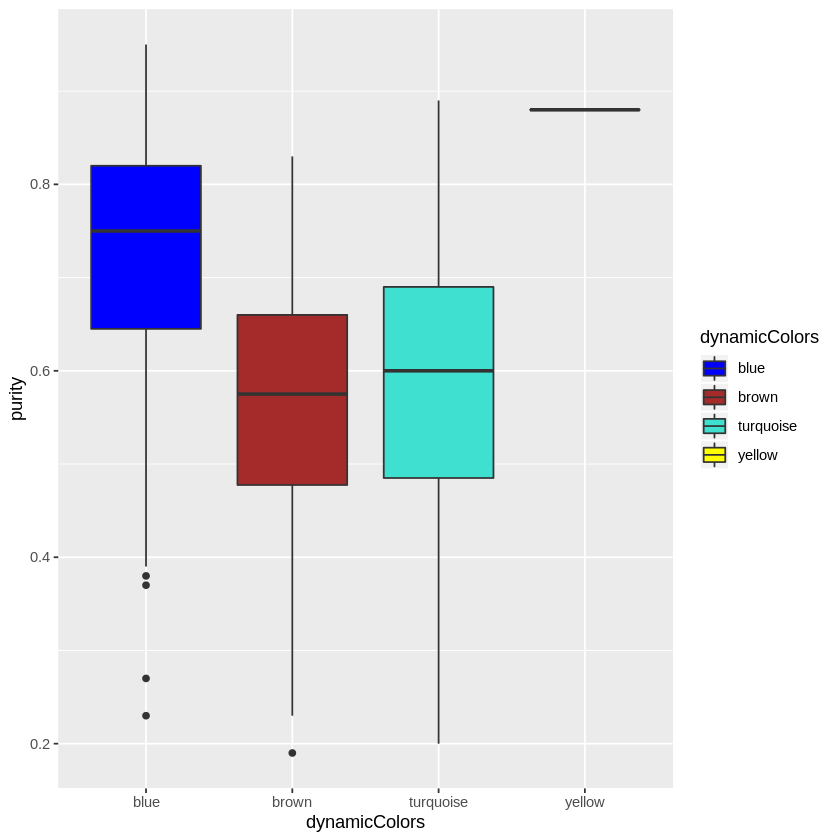

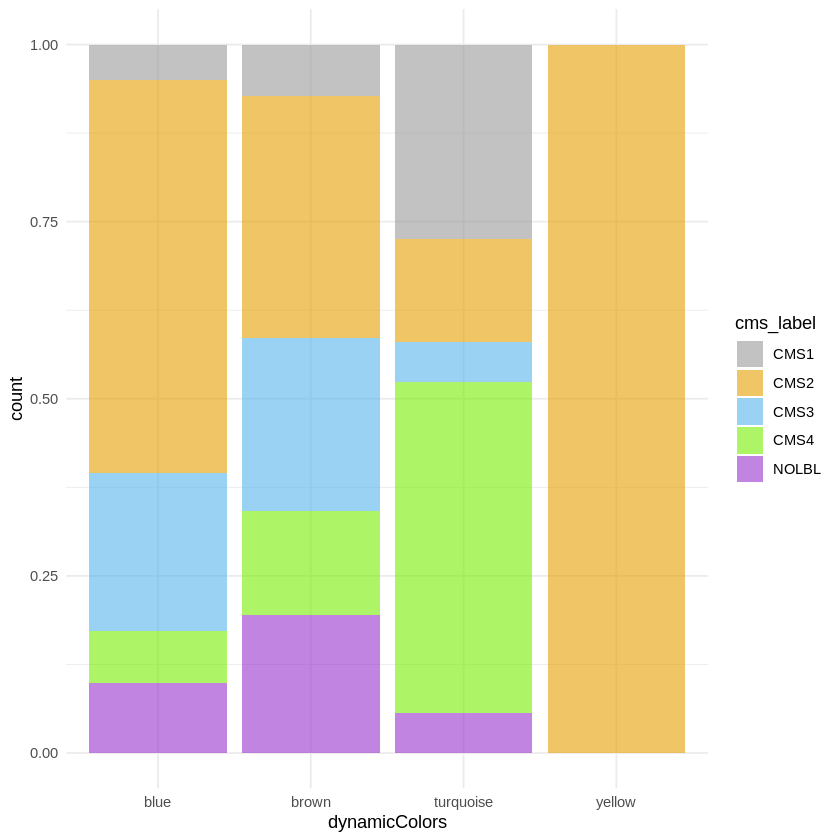

In [12]:
#### 3.Plot_Seperate_clinical_info
library(ggplot2)
############## Mutation count ####################
#Plot.df$totalMut
ggplot(data=subset(Plot.df, !is.na(totalMut))) + 
  geom_boxplot(aes(x = dynamicColors, y = totalMut,fill=dynamicColors)) + 
  scale_fill_manual(values= c("blue","brown","turquoise","yellow"))
############## SCNA count (by genes) #############
#Plot.df$SCNA.gene.counts
ggplot(data=subset(Plot.df, !is.na(SCNA.gene.counts)), aes(x = dynamicColors, y = SCNA.gene.counts,fill=dynamicColors)) + 
  geom_boxplot() + scale_fill_manual(values= c("blue","brown","turquoise","yellow"))
############## MSI Porpotion #####################
# Plot stack order
Plot.df$msi <- relevel(Plot.df$msi, 'mss')
# Remove NA value
ggplot(data=subset(Plot.df, !is.na(msi)), aes(x = dynamicColors, fill = msi)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency

############# CIMP ##############################
# remove NA
#Plot.df$msi <- relevel(Plot.df$msi, 'mss')
#table(!is.na(Plot.df$cimp))
Plot.df$cimp <- factor(Plot.df$cimp, levels = c("CIMP.Neg", "CIMP.Low", "CIMP.High"))
# Remove NA value
ggplot(data=subset(Plot.df, !is.na(cimp)), aes(x = dynamicColors, fill = cimp)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency

############ kras_mut #####################
Plot.df$kras_mut <- as.factor(Plot.df$kras_mut)
ggplot(data=subset(Plot.df, !is.na(kras_mut)), aes(x = dynamicColors, fill = kras_mut)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency

############ braf_mut #####################
Plot.df$braf_mut <- as.factor(Plot.df$braf_mut)
ggplot(data=subset(Plot.df, !is.na(braf_mut)), aes(x = dynamicColors, fill = braf_mut)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency

########### Gene Mutation analysis #############
## APC
Plot.df$APC <- as.factor(Plot.df$APC)
ggplot(data=subset(Plot.df, !is.na(APC)), aes(x = dynamicColors, fill = APC)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency
## KRAS
Plot.df$KRAS <- as.factor(Plot.df$KRAS)
ggplot(data=subset(Plot.df, !is.na(KRAS)), aes(x = dynamicColors, fill = KRAS)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency
## BRAF
Plot.df$BRAF <- as.factor(Plot.df$BRAF)
ggplot(data=subset(Plot.df, !is.na(BRAF)), aes(x = dynamicColors, fill = BRAF)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency
## TP53
Plot.df$TP53 <- as.factor(Plot.df$TP53)
ggplot(data=subset(Plot.df, !is.na(TP53)), aes(x = dynamicColors, fill = TP53)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency

############### Tumor cell purity ###############

#Plot.df$purity
ggplot(Plot.df) + geom_boxplot(aes(x=dynamicColors, y=purity, fill=dynamicColors))+
  scale_fill_manual(values= c("blue","brown","turquoise","yellow"))

############# CMS label ################
# paper: The consensus molecular subtypes of colorectal cancer
#Plot.df$cms_label
ggplot(data=subset(Plot.df, !is.na(cms_label)), aes(x = dynamicColors, fill = cms_label)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD"),0.6)) # transparency




 Left Right 
   96   166 

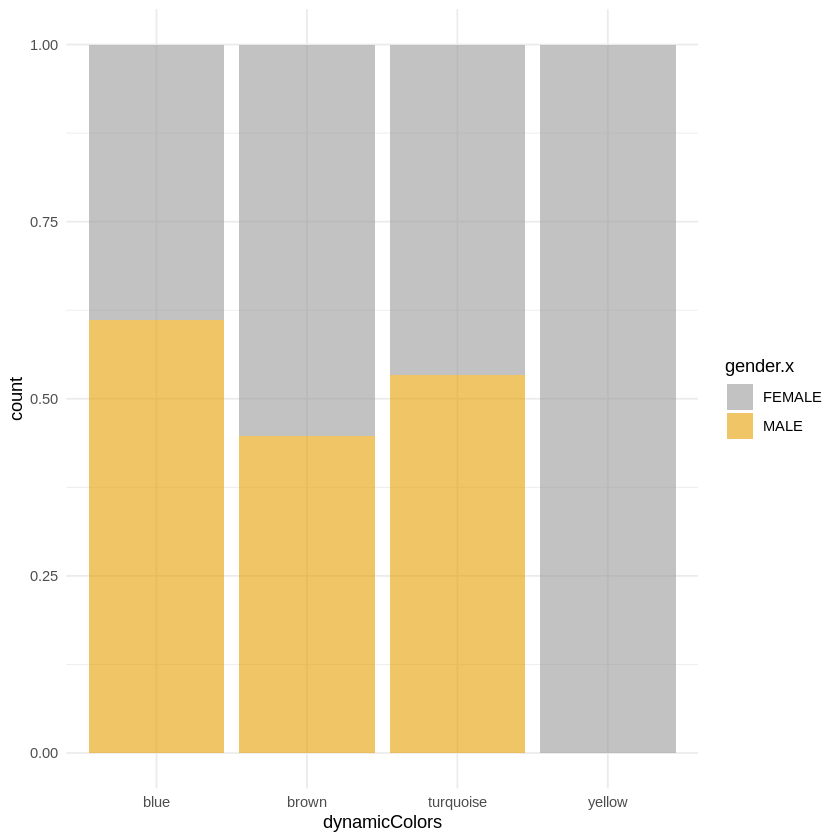


        [Discrepancy]       [Not Available]       Ascending Colon 
                   15                     3                    54 
                Cecum      Descending Colon       Hepatic Flexure 
                   73                    13                    17 
Rectosigmoid Junction         Sigmoid Colon       Splenic Flexure 
                    1                    79                     3 
     Transverse Colon 
                   22 

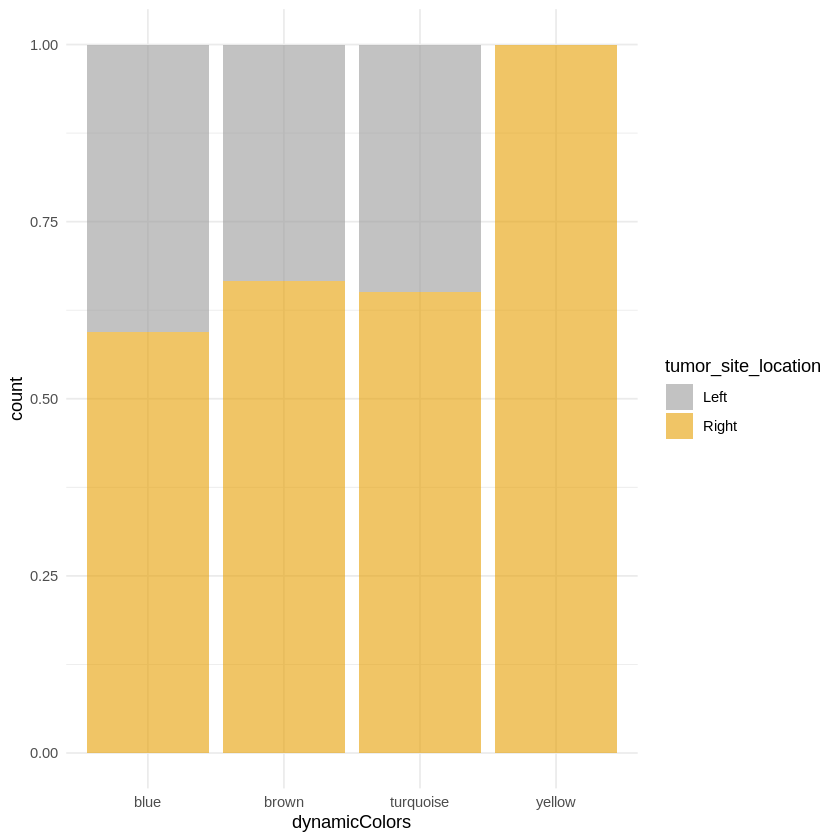

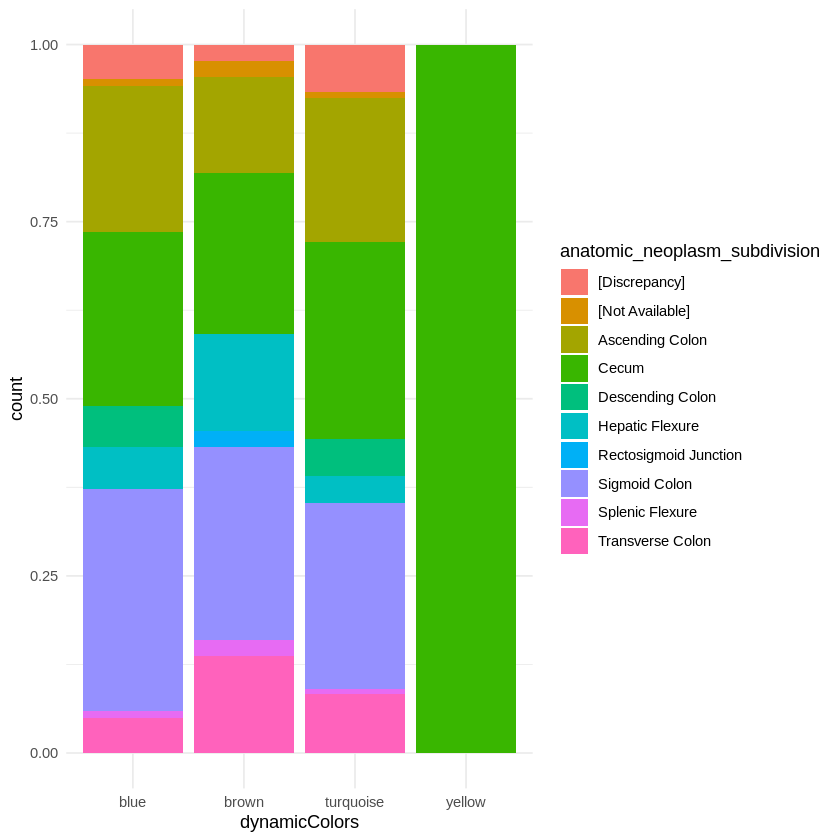

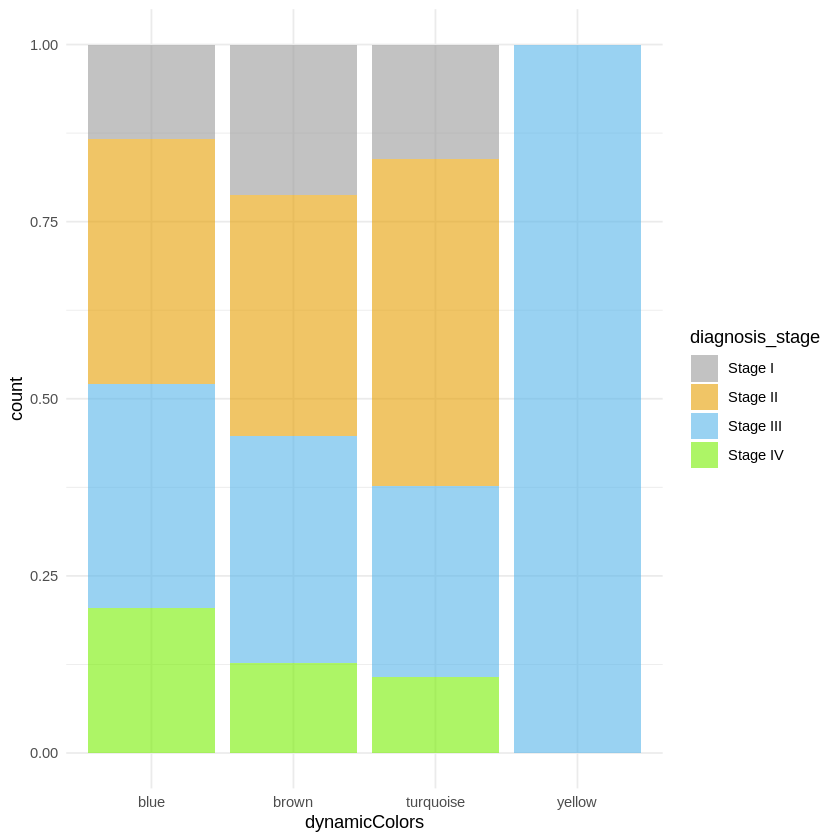

In [6]:
#### 4.Plot_Clinical_Features.R
############## Gender #############################
ggplot(data = Plot.df, aes(x = dynamicColors, fill = gender.x)) +  
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency

############ Tumor site location ###############
table(Plot.df$tumor_site_location)
ggplot(data=subset(Plot.df, !is.na(tumor_site_location)), aes(x = dynamicColors, fill = tumor_site_location)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD","#CD6600"),0.6)) # transparency

table(Plot.df$anatomic_neoplasm_subdivision)
ggplot(data=subset(Plot.df, !is.na(anatomic_neoplasm_subdivision)), aes(x = dynamicColors, fill = anatomic_neoplasm_subdivision)) + 
  geom_bar(position = "fill") + theme_minimal()
  #scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD","#CD6600"),0.6)) # transparency

############ Diagnosis Stage I II III ###############
Plot.df$diagnosis_stage <- gsub("[ABC]","",Plot.df$ajcc_pathologic_tumor_stage)
Plot.df[Plot.df$diagnosis_stage == "",]$diagnosis_stage <-NA
Plot.df[Plot.df$diagnosis_stage %in% "[Discrepancy]",]$diagnosis_stage <-NA
#table(Plot.df$ajcc_pathologic_tumor_stage)
#Plot.df$diagnosis_stage
ggplot(data=subset(Plot.df, !is.na(diagnosis_stage)), aes(x = dynamicColors, fill = diagnosis_stage)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD","#CD6600"),0.6)) # transparency


Warning message:
“Removed 22 rows containing non-finite values (stat_boxplot).”

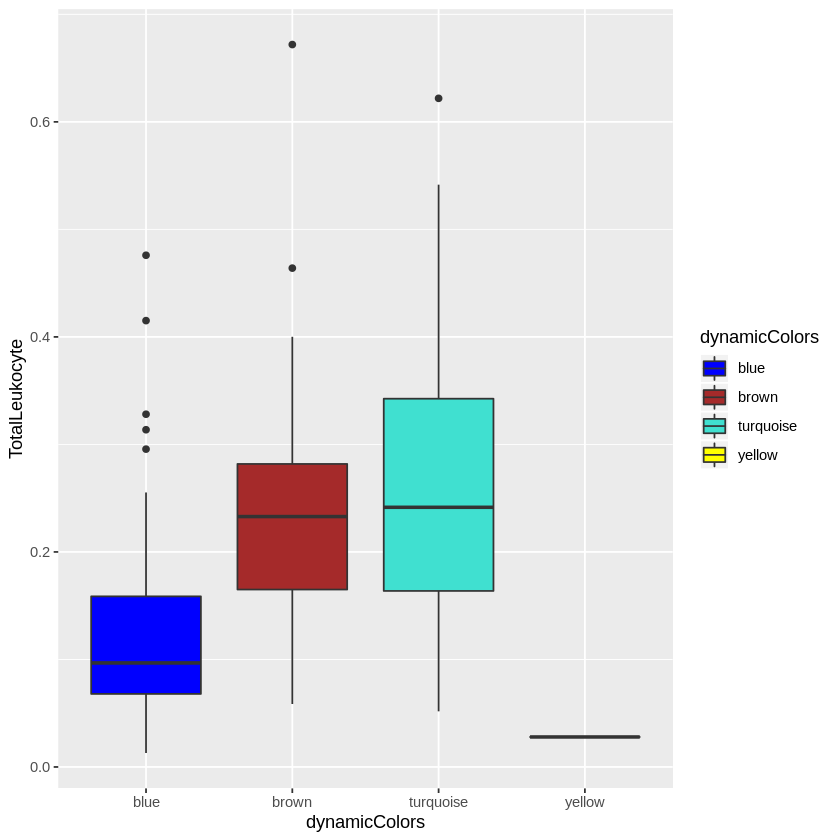

Warning message:
“Removed 3 rows containing non-finite values (stat_boxplot).”

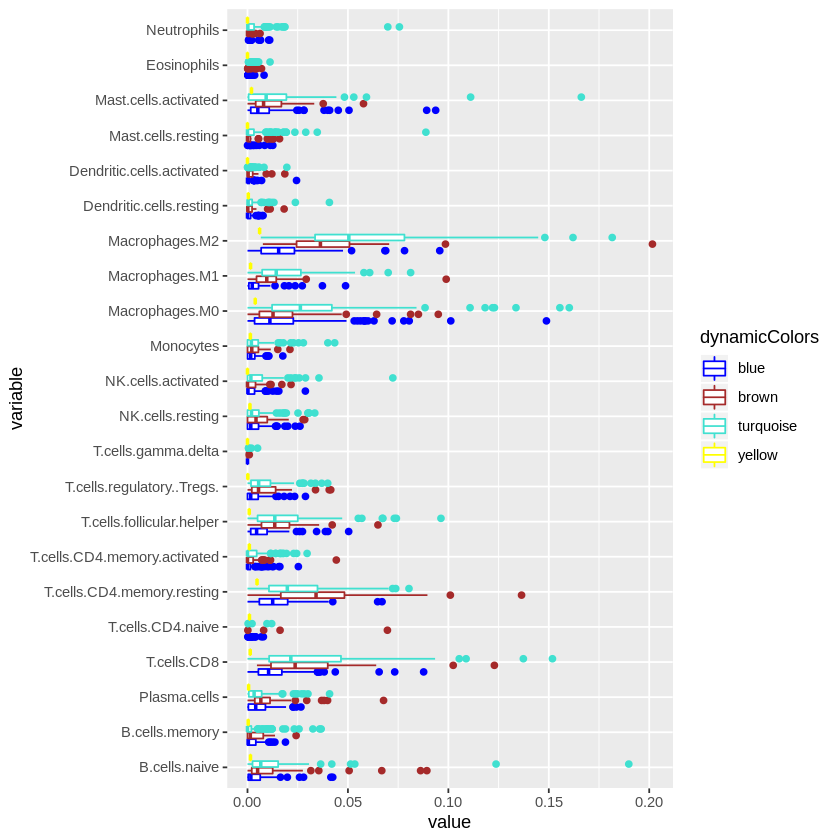

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

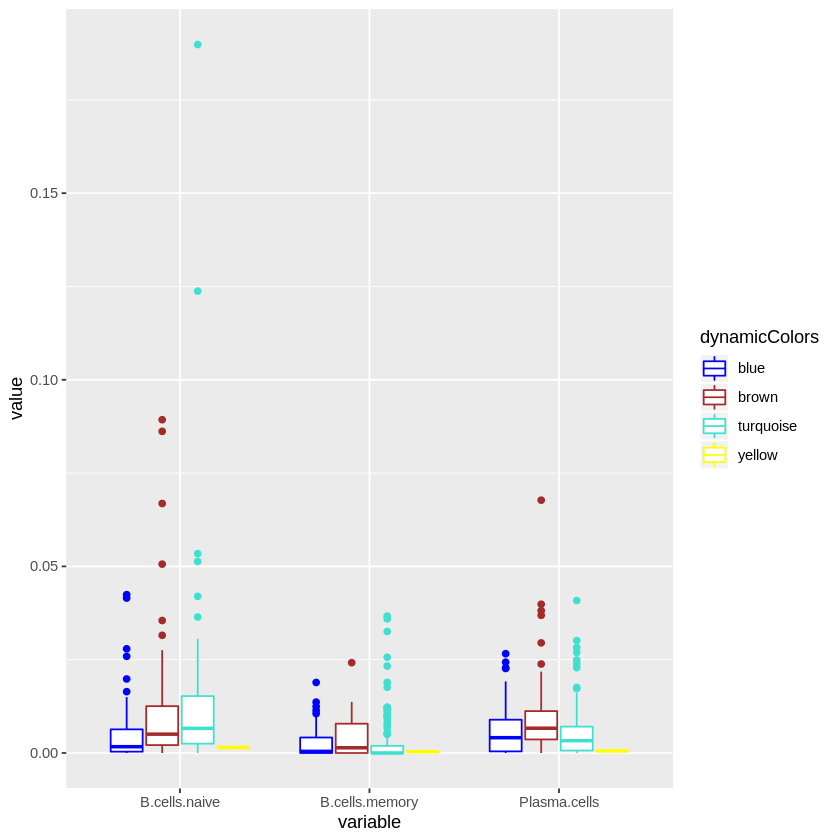

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”

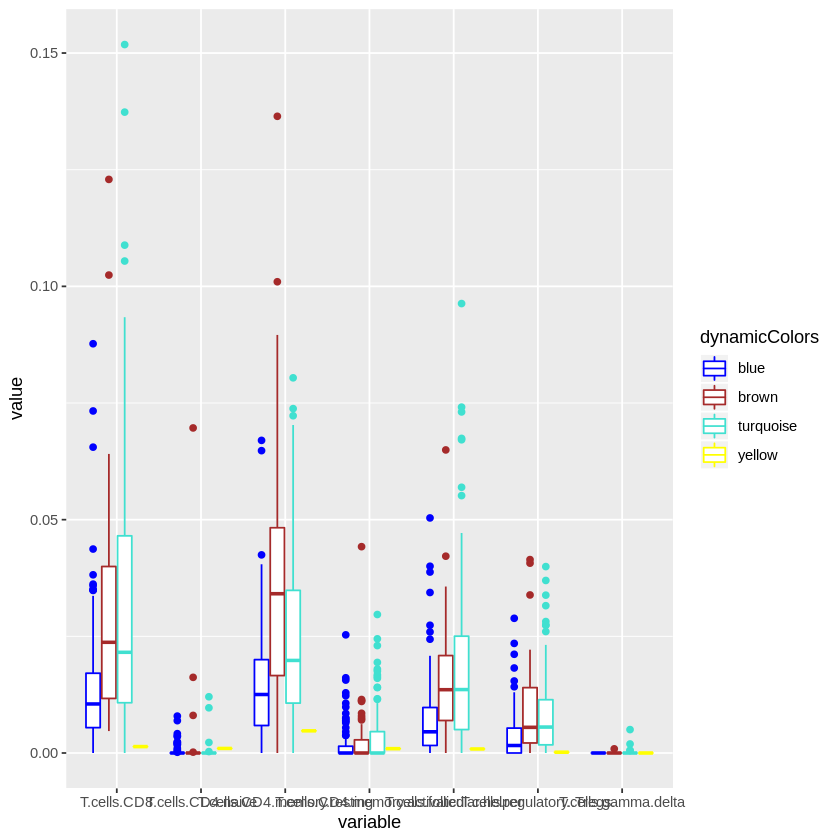

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”

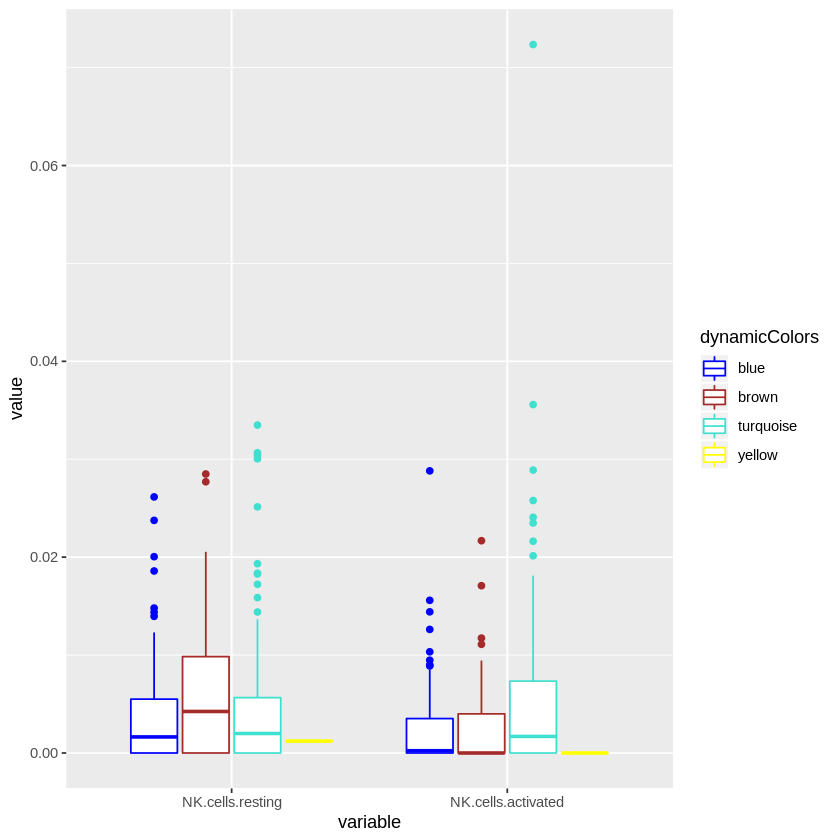

Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”

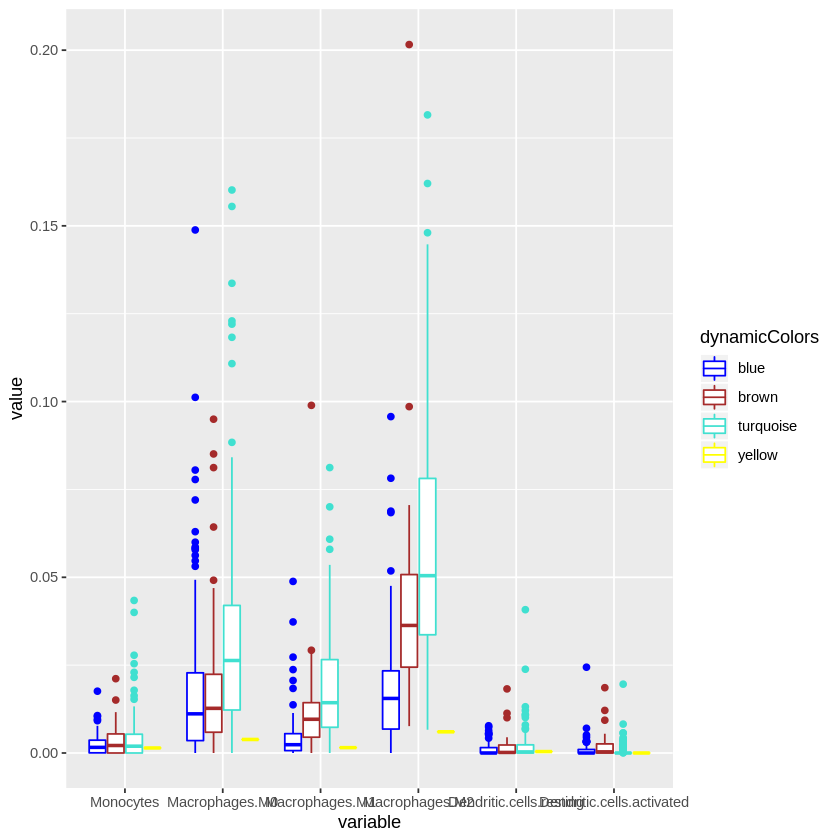

Warning message:
“Removed 12 rows containing non-finite values (stat_boxplot).”

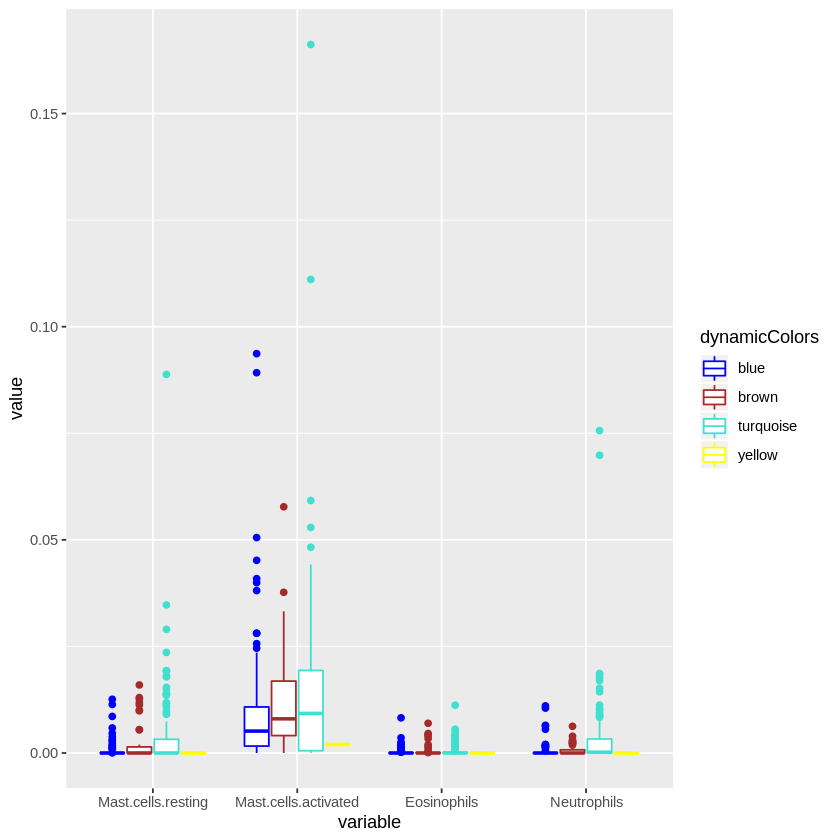

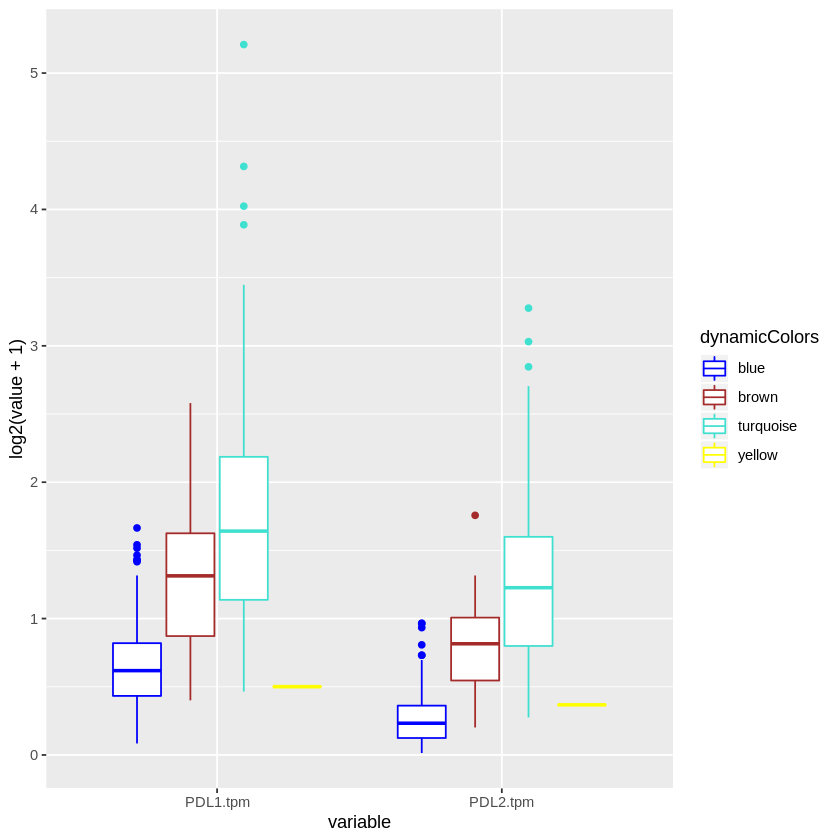

In [13]:
#### 5.Immune_Infiltration_Analysis.R
library(ggplot2)
##### TotalLeukocyte
#Plot.df$TotalLeukocyte
ggplot(data=subset(Plot.df, !is.na(TotalLeukocyte)), aes(x = dynamicColors, y = TotalLeukocyte,fill=dynamicColors)) + 
  geom_boxplot() + scale_fill_manual(values= c("blue","brown","turquoise","yellow"))
##### Different immune cell type comparison ######
## 1.Extract immune cell info
#colnames(Plot.df)
immuneCell.df <- Plot.df[,61:82] ## But this is relative infiltration of each cell type
## 2.Get the absolute infiltration value for immune cells
# Relative value multiple TotalLeukocyte(ESTIMATE)
immuneCell.Absolute.df <- as.data.frame(apply(immuneCell.df,2,function(x){x*Plot.df$TotalLeukocyte}))
## 3.Construct ggplot dataframe
immuneCell.Absolute.df$dynamicColors <- Plot.df$dynamicColors
library(reshape2)
dat.m <- melt(immuneCell.Absolute.df,id.vars='dynamicColors')
library(ggplot2)
ggplot(dat.m) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + coord_flip()+
scale_color_manual(values= c("blue","brown","turquoise","yellow"))
## 4.Cell type plot ##
#colnames(immuneCell.Absolute.df)
# B cells
dat.m.Bcell <- melt(immuneCell.Absolute.df[,c(1:3,23)],id.vars='dynamicColors')
ggplot(dat.m.Bcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
 scale_color_manual(values= c("blue","brown","turquoise","yellow"))
# T cells
dat.m.Tcell <- melt(immuneCell.Absolute.df[,c(4:10,23)],id.vars='dynamicColors')
ggplot(dat.m.Tcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))
# NK cells
dat.m.NKcell <- melt(immuneCell.Absolute.df[,c(11:12,23)],id.vars='dynamicColors')
ggplot(dat.m.NKcell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))
# Monocytopoiesis
dat.m.Monocell <- melt(immuneCell.Absolute.df[,c(13:18,23)],id.vars='dynamicColors')
ggplot(dat.m.Monocell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) +
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))
# Granulopoiesis
dat.m.Grancell <- melt(immuneCell.Absolute.df[,c(19:22,23)],id.vars='dynamicColors')
ggplot(dat.m.Grancell) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) + 
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))
########## PD-1 expression ###############
dat.m.Grancell <- melt(Plot.df[,c(2,111:112)],id.vars='dynamicColors')
## Transform the tpm expression to log2(x+1)
ggplot(dat.m.Grancell) + geom_boxplot(aes(x=variable, y=log2(value+1), color=dynamicColors)) +
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))


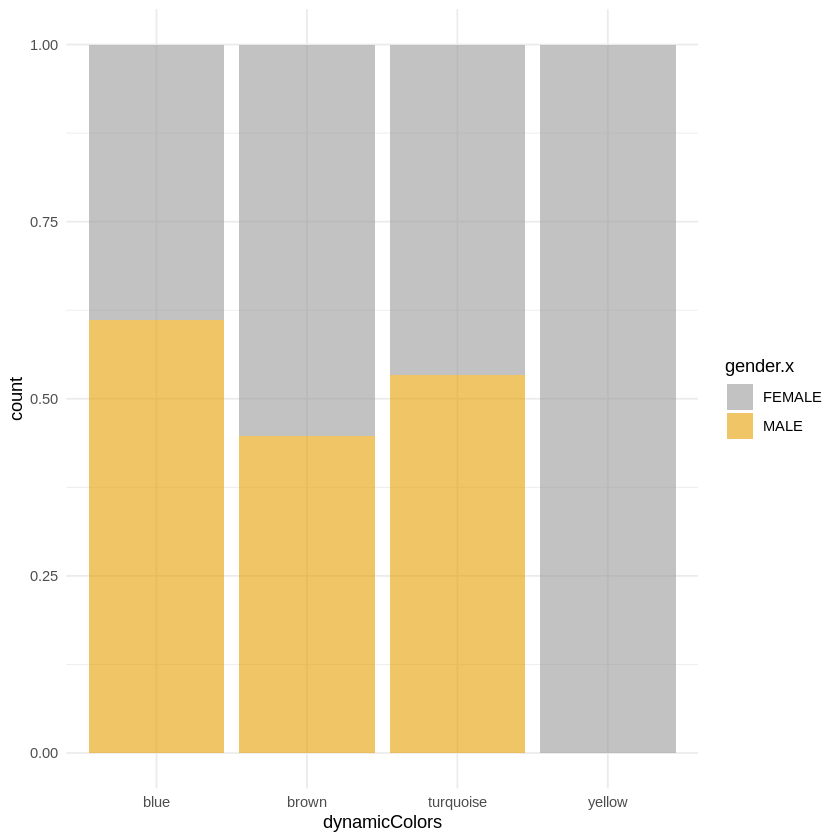

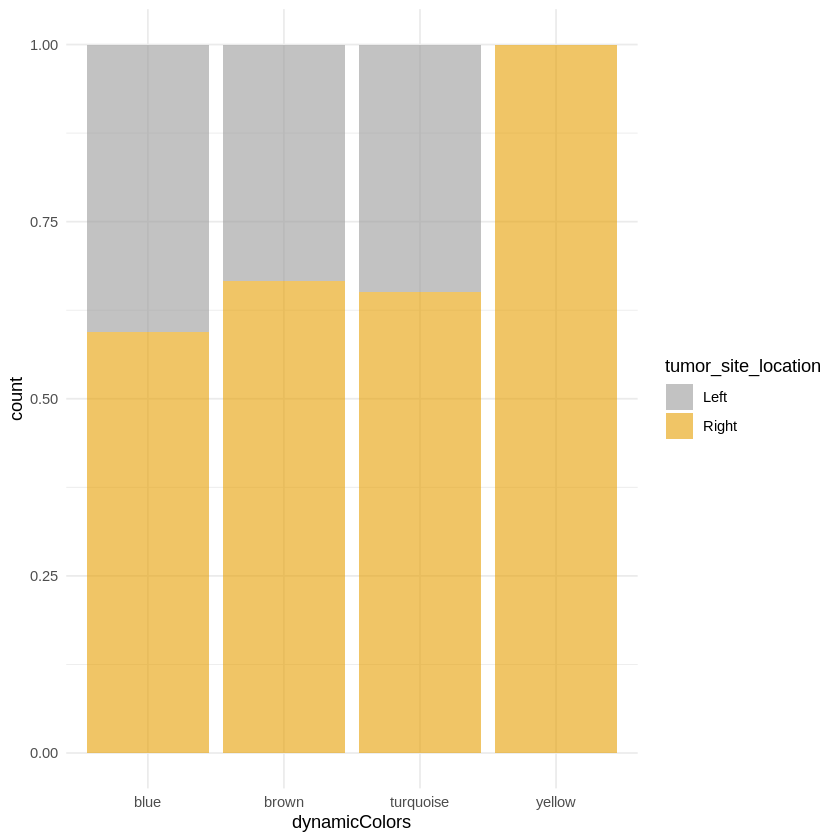

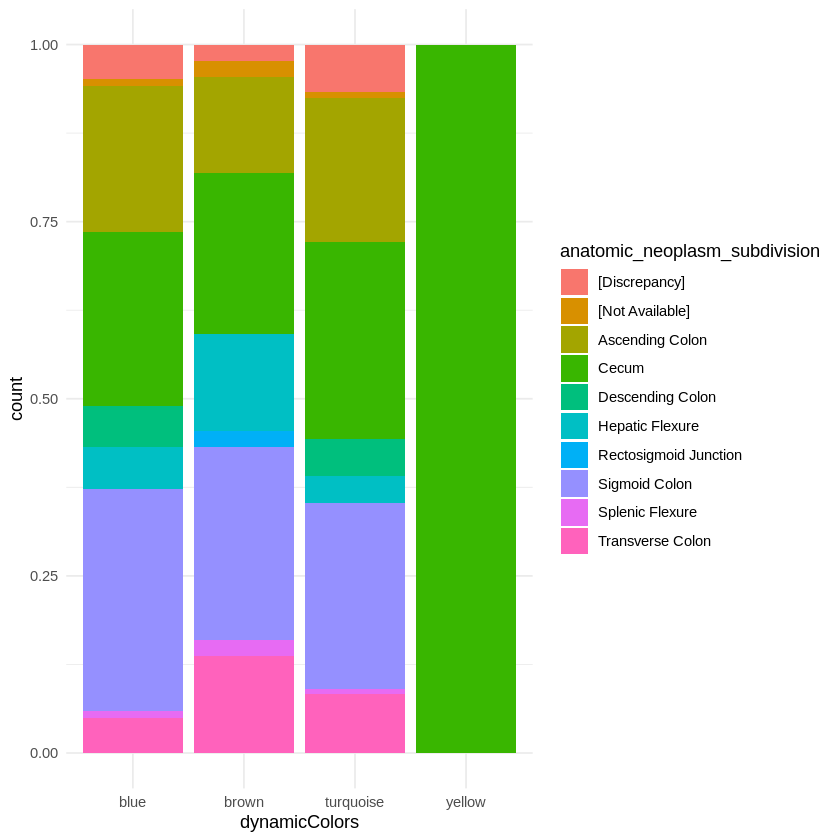

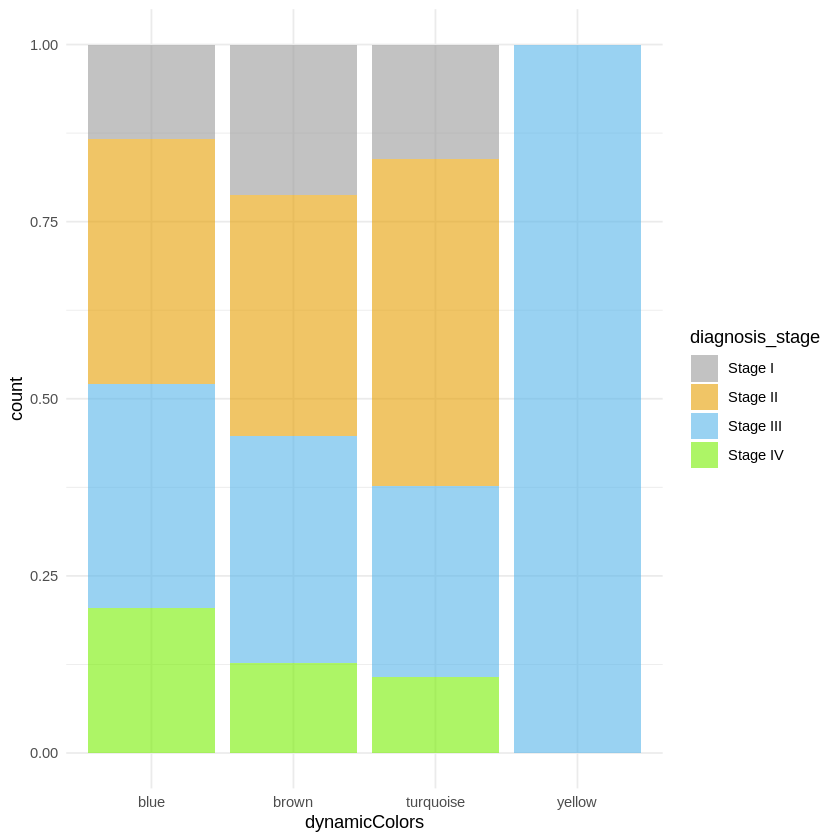

In [14]:
#### 4.Plot_Clinical_Features.R
############## Gender #############################
ggplot(data = Plot.df, aes(x = dynamicColors, fill = gender.x)) +  
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9"),0.6)) # transparency

############ Tumor site location ###############
#table(Plot.df$tumor_site_location)
ggplot(data=subset(Plot.df, !is.na(tumor_site_location)), aes(x = dynamicColors, fill = tumor_site_location)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD","#CD6600"),0.6)) # transparency

#table(Plot.df$anatomic_neoplasm_subdivision)
ggplot(data=subset(Plot.df, !is.na(anatomic_neoplasm_subdivision)), aes(x = dynamicColors, fill = anatomic_neoplasm_subdivision)) + 
  geom_bar(position = "fill") + theme_minimal()
  #scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD","#CD6600"),0.6)) # transparency

############ Diagnosis Stage I II III ###############
Plot.df$diagnosis_stage <- gsub("[ABC]","",Plot.df$ajcc_pathologic_tumor_stage)
Plot.df[Plot.df$diagnosis_stage == "",]$diagnosis_stage <-NA
Plot.df[Plot.df$diagnosis_stage %in% "[Discrepancy]",]$diagnosis_stage <-NA
#table(Plot.df$ajcc_pathologic_tumor_stage)
#Plot.df$diagnosis_stage
ggplot(data=subset(Plot.df, !is.na(diagnosis_stage)), aes(x = dynamicColors, fill = diagnosis_stage)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD","#CD6600"),0.6)) # transparency


Warning message:
“Removed 82 rows containing non-finite values (stat_boxplot).”

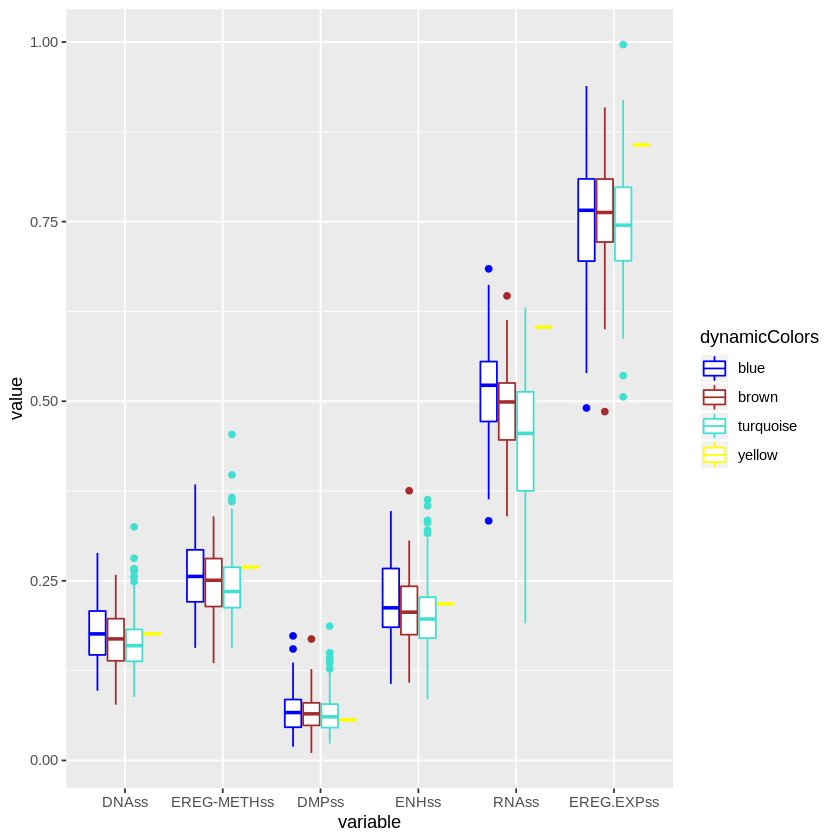

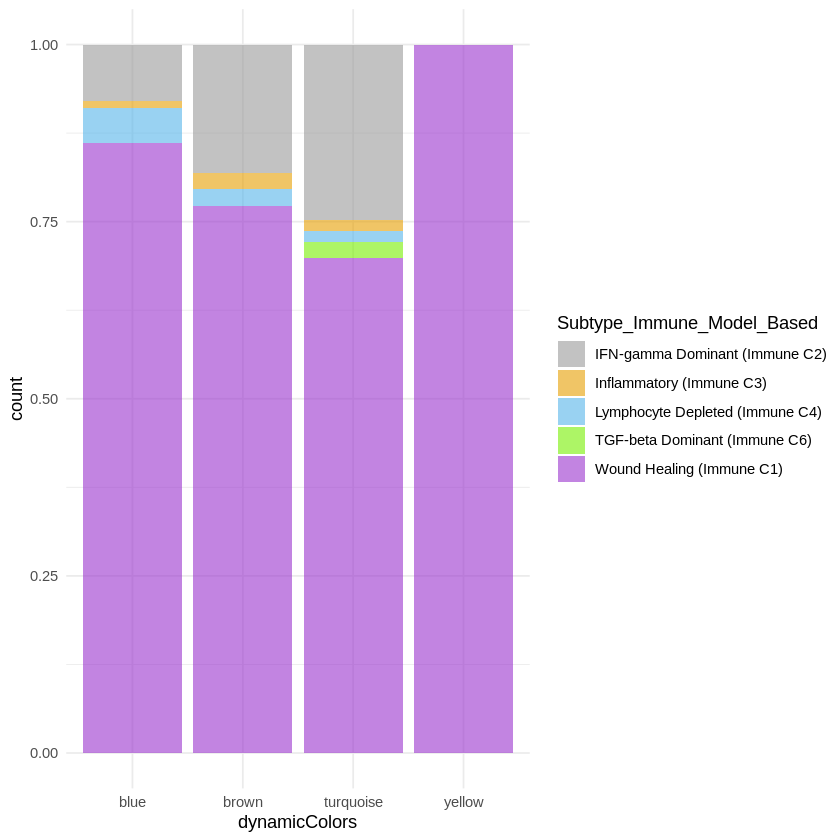

In [16]:
#### 6.Xena_panCancer_signature_analysis.R
### 1)Loading cluster resaults
Cluster.20200201.V7.Tumor <- readRDS("/data8t_4/JH/MyJobs/NormalCancer_TCGA_V2/Cluster.20200201.V7.Tumor.rds")
#cutree.res <- Cluster.20200201.V7.Tumor$cutree.res
#dynamicColors <- Cluster.20200201.V7.Tumor$dynamicColors
Cluster.df <- cbind(cutree.res,dynamicColors) 
Cluster.df <- as.data.frame(Cluster.df)
Cluster.df$rownames <- rownames(Cluster.df)
############ Stemness score analysis ############
### 2)Loading StemnessScore dataset
## Paper : Machine Learning Identifies Stemness Features
#Associated with Oncogenic Dedifferentiation
## DNAss
COAD_StemnessScores_DNAmeth_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_Pan_Cancer/signatures/Stemness_score_DNA_methylation_based/COAD_StemnessScores_DNAmeth_dataset.rds")
COAD.StemnessScores.DNAmeth<- COAD_StemnessScores_DNAmeth_dataset$COAD.pancancer.StemnessScores.DNAmeth.xena
COAD.StemnessScores.DNAmeth <- as.data.frame(t(COAD.StemnessScores.DNAmeth))
COAD.StemnessScores.DNAmeth$rownames <- rownames(COAD.StemnessScores.DNAmeth)
## RNAss
COAD_StemnessScores_RNAexp_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_Pan_Cancer/signatures/Stemness_score_RNA_based/COAD_StemnessScores_RNAexp_dataset.rds")
COAD.StemnessScores.RNAexp<- COAD_StemnessScores_RNAexp_dataset$COAD.pancancer.StemnessScores.RNAexp.xena
COAD.StemnessScores.RNAexp <- as.data.frame(t(COAD.StemnessScores.RNAexp))
COAD.StemnessScores.RNAexp$rownames <- rownames(COAD.StemnessScores.RNAexp)

########### Immune subtype analysis ########################
## Paper:The Immune Landscape of Cancer
COAD_Subtype_Immune_dataset <- readRDS("/data8t_4/JH/MyJobs/Read_dataset/TCGA_Pan_Cancer/TCGA_panCancer_phenotype_Immune_subtype/COAD_Subtype_Immune_dataset.rds")
COAD.Subtype.Immune <- COAD_Subtype_Immune_dataset$COAD.Subtype.Immune.xena

### 2)Constucting Ploting dataframe

Plot.df.TCGA.signature <- dplyr::left_join(Cluster.df, COAD.StemnessScores.DNAmeth, by = "rownames")
Plot.df.TCGA.signature <- dplyr::left_join(Plot.df.TCGA.signature, COAD.StemnessScores.RNAexp, by = "rownames")
Plot.df.TCGA.signature <- dplyr::left_join(Plot.df.TCGA.signature, COAD.Subtype.Immune, by = "rownames")

### 3)Plotting
## Stemness DNA RNA
#Plot.df.TCGA.signature$RNAss
library(reshape2)
dat.m.stemness <- melt(Plot.df.TCGA.signature[,c(2,4:9)],id.vars='dynamicColors')
ggplot(dat.m.stemness) + geom_boxplot(aes(x=variable, y=value, color=dynamicColors)) +
  scale_color_manual(values= c("blue","brown","turquoise","yellow"))
##Immune subtype
library(reshape2)
#Plot.df.TCGA.signature$Subtype_Immune_Model_Based
ggplot(data=subset(Plot.df.TCGA.signature, !is.na(Subtype_Immune_Model_Based)), aes(x = dynamicColors, fill = Subtype_Immune_Model_Based)) + 
  geom_bar(position = "fill") + theme_minimal()+
  scale_fill_manual(values= alpha(c("#999999", "#E69F00", "#56B4E9","#76EE00","#9A32CD","#CD6600"),0.6)) # transparency


